# Diffusion Validation
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

In [2]:
import numpy
import filecmp

MatPlotLib and Plotly are used for creating custom visualizations

In [3]:
import matplotlib.pyplot as plt

In [4]:
import spatialpy

***
## Create the Diffusion Model
***

In [5]:
def create_diffusion_model(model_name="diffusion_debug_test", parameter_values=None):
    # Initialize Model
    model = spatialpy.Model(model_name)

    # System constants
    D_const = 0.005

    # Define Domain
    domain = spatialpy.Domain.create_2D_domain(
        xlim=[-1, 1], ylim=[-1, 1], numx=50, numy=50, type_id=1, 
        mass=1.0, nu=1.0, fixed=True,  rho0=1.0, c0=1.0, P0=1.0
    )
    
    # Set Models Domain
    model.add_domain(domain)

    # Define Variables (SpatialPy.Species)
    A = spatialpy.Species(name="A", diffusion_coefficient=D_const)
    B = spatialpy.Species(name="B", diffusion_coefficient=D_const)
    
    # Add Variables to Model
    model.add_species([A, B])

    # Define Initial Conditions
    A_ic = spatialpy.PlaceInitialCondition(A, 10000, [0,0,0])
    
    # Add Initial Conditions to Model
    model.add_initial_condition(A_ic)

    # Define Timespan
    tspan = spatialpy.TimeSpan.linspace(t=5, num_points=11, timestep_size=0.1)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [6]:
model = create_diffusion_model()

### Instantiate the Solver

In [7]:
sol = spatialpy.Solver(model, debug_level=0)
sol.compile()

***
## Run the Simulations
***

In [8]:
result = sol.run()

In [9]:
%time result2 = sol.run()

CPU times: user 526 µs, sys: 3.03 ms, total: 3.56 ms
Wall time: 1.05 s


In [10]:
filecmp.cmpfiles.__defaults__ = (False,)
dircmp = filecmp.dircmp(result.result_dir, result2.result_dir)
print(dircmp.report_full_closure())
print(dircmp.diff_files)
print(dircmp.left_only)
print(dircmp.right_only)
print(result == result2)

diff /var/folders/z4/bqpnd_kx7xg3s3c9jtz0pnfh0000gn/T/spatialpy_result_0h4rqfgh /var/folders/z4/bqpnd_kx7xg3s3c9jtz0pnfh0000gn/T/spatialpy_result_75lzln2y
Identical files : ['output0.vtk', 'output0_boundingBox.vtk']
Differing files : ['output1.vtk', 'output10.vtk', 'output11.vtk', 'output2.vtk', 'output3.vtk', 'output4.vtk', 'output5.vtk', 'output6.vtk', 'output7.vtk', 'output8.vtk', 'output9.vtk']
None
['output1.vtk', 'output10.vtk', 'output11.vtk', 'output2.vtk', 'output3.vtk', 'output4.vtk', 'output5.vtk', 'output6.vtk', 'output7.vtk', 'output8.vtk', 'output9.vtk']
[]
[]
False


***
## Visualizations
***

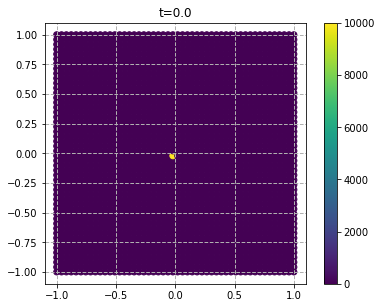

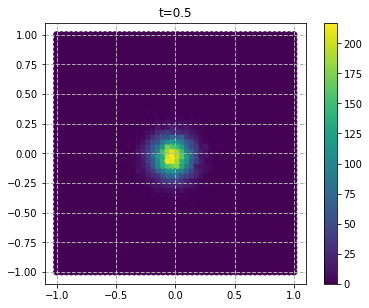

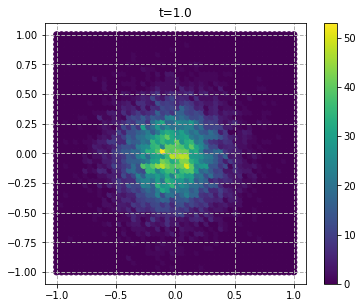

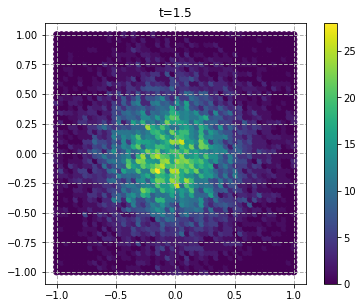

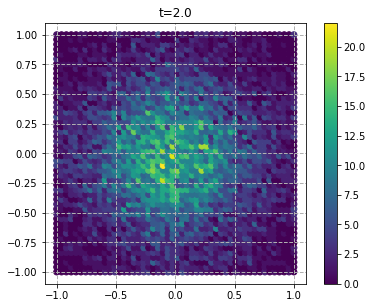

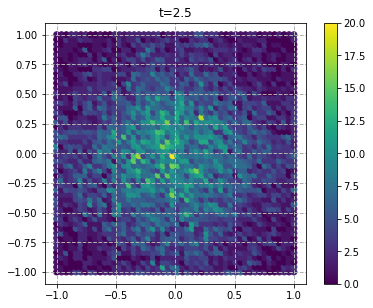

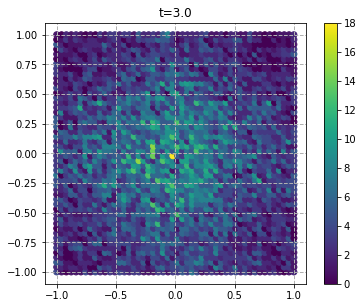

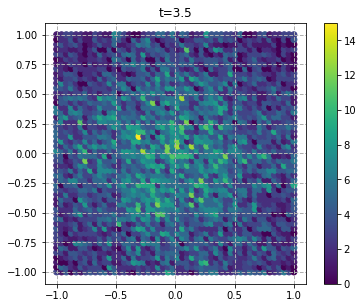

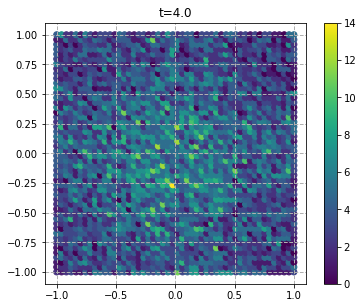

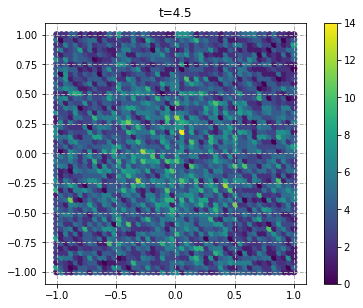

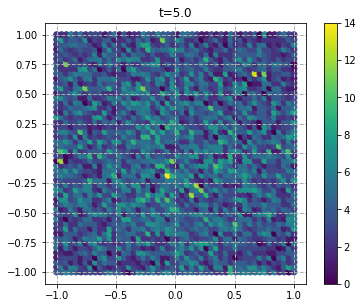

In [11]:
for i, t in enumerate(result.get_timespan()):
    result.plot_species("A", i, use_matplotlib=True)
    plt.title(f"t={t}")

In [12]:
def binit(x, y, y2=None):
    bins = sorted(list(set(x)))
    bin_values = numpy.zeros(50)
    if y2 is not None:
        y = numpy.sqrt(y**2+y2**2)
    for i, v in enumerate(y):
        for j, b in enumerate(bins):
            if x[i] == b:
                bin_values[j] += v
    return bins, bin_values

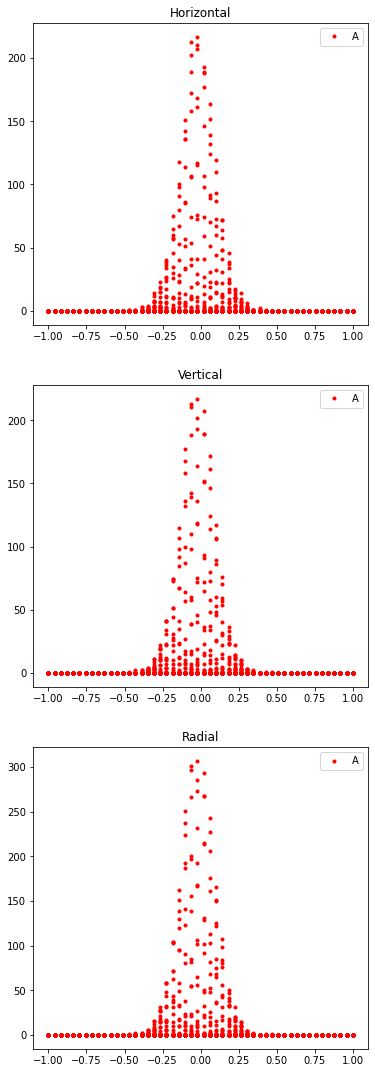

In [13]:
hx_vals = model.domain.coordinates()[:, 0]
hA_vals = result.get_species("A", timepoints=1, concentration=False)
vx_vals = model.domain.coordinates()[:, 1]
vA_vals = result.get_species("A", timepoints=1, concentration=False)

plt.figure(figsize=(6, 6))
plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 1)
plt.title('Horizontal')

plt.plot(hx_vals, hA_vals, '.r')
plt.legend(['A'], loc='best')

plt.subplot(3 ,1 ,2)
plt.title('Vertical')

plt.plot(vx_vals, vA_vals, '.r')
plt.legend(['A'], loc='best')

plt.subplot(3, 1, 3)
plt.title('Radial')

plt.plot(vx_vals, numpy.sqrt(vA_vals**2 + hA_vals**2), '.r')
plt.legend(['A'] ,loc='best')

In [14]:
dist_and_count = dict(zip(hx_vals, hA_vals))

In [15]:
hbins, hbin_values = binit(hx_vals, hA_vals)
vbins, vbin_values = binit(vx_vals, vA_vals)
rbins, rbin_values = binit(hx_vals, hA_vals, vA_vals)

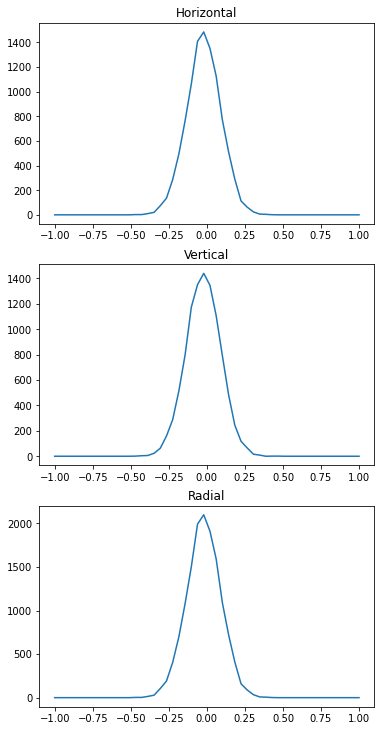

In [16]:
plt.subplot(3, 1, 1)
plt.title('Horizontal')
plt.plot(hbins, hbin_values)
plt.subplot(3, 1, 2)
plt.title('Vertical')
plt.plot(vbins, vbin_values)
plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 3)
plt.title('Radial')
plt.plot(rbins, rbin_values)

In [17]:
def countit(x, y, y2=None):
    counts = []
    if y2 is not None:
        y = numpy.sqrt(y**2 + y2**2)
    for i in range(len(x)):
        j = 0
        while j < y[i]:
            counts.append(hx_vals[i])
            j += 1
    return counts

(array([4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.800e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 3.500e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.100e+02, 0.000e+00, 0.000e+00, 0.000e+00, 1.980e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.110e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 7.100e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.088e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.512e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.999e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.107e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        1.920e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.600e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 1.098e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.300e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        4.210e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.690e+02,
        0.000e+00, 0.000e+00, 0.000e+0

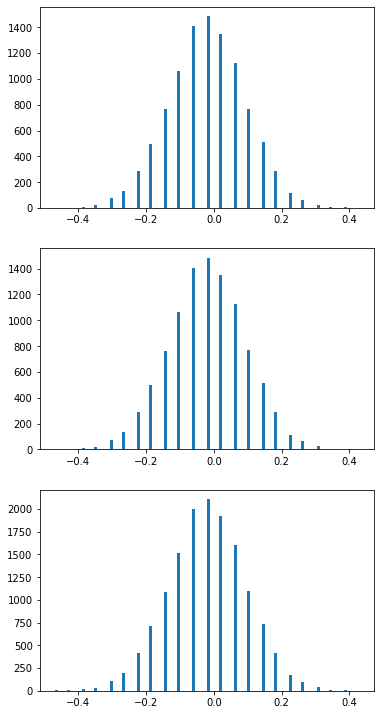

In [18]:
hcounts = countit(hx_vals, hA_vals)
vcounts = countit(vx_vals, vA_vals)
rcounts = countit(hx_vals, hA_vals, vA_vals)

plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 1)
plt.hist(hcounts, bins=100)
plt.subplot(3, 1, 2)
plt.hist(vcounts, bins=100)
plt.subplot(3, 1, 3)
plt.hist(rcounts, bins=100)